In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-countries-rankings-by-suicide-rate-2023/world_suicide_rate_2023.csv


In [4]:
data = pd.read_csv("/kaggle/input/world-countries-rankings-by-suicide-rate-2023/world_suicide_rate_2023.csv")

In [5]:
data

,Country,All,Female,Male,M/F,2000,Change%
0,World,9.0,5.4,12.6,2.3,14.0,-0.36
1,Lithuania,48.5,6.2,36.1,5.8,45.8,-0.56
2,Kiribati,30.6,9.5,53.6,5.7,35.6,-0.14
3,Micronesia,29.0,13.2,44.3,3.4,28.0,0.04
4,Suriname,25.9,11.8,41.3,3.5,25.0,0.04
...,...,...,...,...,...,...,...
176,Jordan,2.0,0.9,3.0,3.3,3.5,-0.43
177,Saint Vincent and the Grenadines,1.0,0.7,1.3,2.0,6.5,-0.84
178,Grenada,0.6,0.7,0.5,0.7,2.1,-0.70
179,Antigua and Barbuda,0.3,0.6,0.0,0.0,2.0,-0.84


In [7]:
data.head()

,Country,All,Female,Male,M/F,2000,Change%
0,World,9.0,5.4,12.6,2.3,14.0,-0.36
1,Lithuania,48.5,6.2,36.1,5.8,45.8,-0.56
2,Kiribati,30.6,9.5,53.6,5.7,35.6,-0.14
3,Micronesia,29.0,13.2,44.3,3.4,28.0,0.04
4,Suriname,25.9,11.8,41.3,3.5,25.0,0.04


In [8]:
data = data.drop(0)

In [12]:
data.head()

,Country,All,Female,Male,M/F,2000,Change%
1,Lithuania,48.5,6.2,36.1,5.8,45.8,-0.56
2,Kiribati,30.6,9.5,53.6,5.7,35.6,-0.14
3,Micronesia,29.0,13.2,44.3,3.4,28.0,0.04
4,Suriname,25.9,11.8,41.3,3.5,25.0,0.04
5,Zimbabwe,23.6,13.5,37.8,2.8,20.0,0.18


In [13]:
data.describe()

,All,Female,Male,M/F,2000,Change%
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,9.473889,4.288889,14.793889,3.735000,12.790000,-0.199389
std,6.346735,2.673121,9.746944,1.764405,9.003606,0.272717
min,0.300000,0.200000,0.000000,0.000000,1.700000,-0.880000
25%,5.200000,2.200000,7.475000,2.500000,6.375000,-0.365000
50%,8.300000,3.750000,13.300000,3.400000,10.900000,-0.205000
75%,12.225000,5.850000,19.450000,4.525000,17.000000,-0.090000
max,48.500000,13.500000,53.600000,13.400000,48.900000,0.690000


In [14]:
top_countries = data.sort_values(by='All', ascending=False).head(10)
print("Top countries with the highest overall suicide rates in 2023:")
print(top_countries[['Country', 'All']])

Top countries with the highest overall suicide rates in 2023:
                     Country   All
1                  Lithuania  48.5
2                   Kiribati  30.6
3                 Micronesia  29.0
4                   Suriname  25.9
5                   Zimbabwe  23.6
6               South Africa  23.5
7                 Mozambique  23.2
8   Central African Republic  23.0
9                     Russia  21.6
10               South Korea  21.2


In [18]:
top_countriesG = data.sort_values(by='Male',ascending=False).head(5)
print("Top countries with highest male overall suicide rates in 2023:")
print(top_countriesG[['Country','Male']])

Top countries with highest male overall suicide rates in 2023:
                    Country  Male
2                  Kiribati  53.6
3                Micronesia  44.3
7                Mozambique  42.6
4                  Suriname  41.3
8  Central African Republic  39.6


In [20]:
data['Change'] = data['All'] - data['2000']

# Display the change in suicide rate for each country
print("Change in suicide rate from 2000 to 2023:")
print(data[['Country', 'Change']])

Change in suicide rate from 2000 to 2023:
                              Country  Change
1                           Lithuania     2.7
2                            Kiribati    -5.0
3                          Micronesia     1.0
4                            Suriname     0.9
5                            Zimbabwe     3.6
..                                ...     ...
176                            Jordan    -1.5
177  Saint Vincent and the Grenadines    -5.5
178                           Grenada    -1.5
179               Antigua and Barbuda    -1.7
180                          Barbados    -2.3

[180 rows x 2 columns]


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
pip install matplotlib

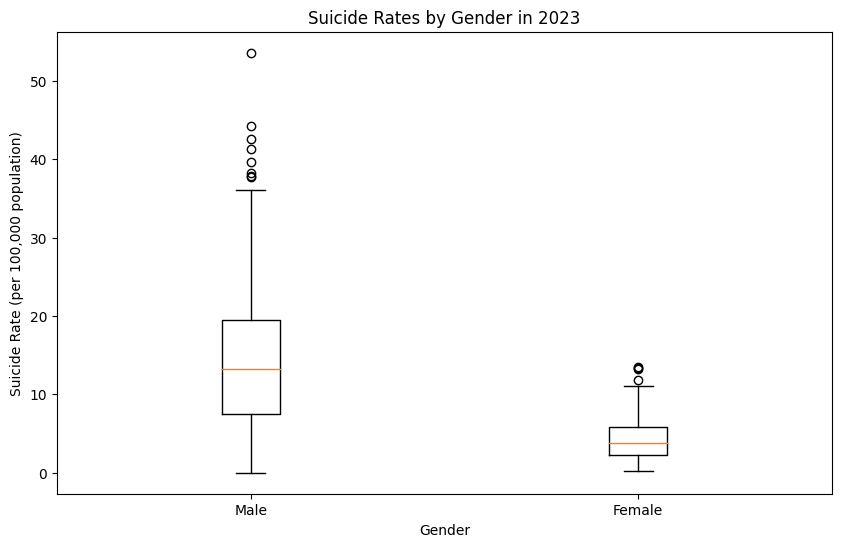

In [44]:
plt.figure(figsize=(10, 6))
plt.boxplot([data['Male'], data['Female']], labels=['Male', 'Female'])
plt.title('Suicide Rates by Gender in 2023')
plt.xlabel('Gender')
plt.ylabel('Suicide Rate (per 100,000 population)')
plt.show()


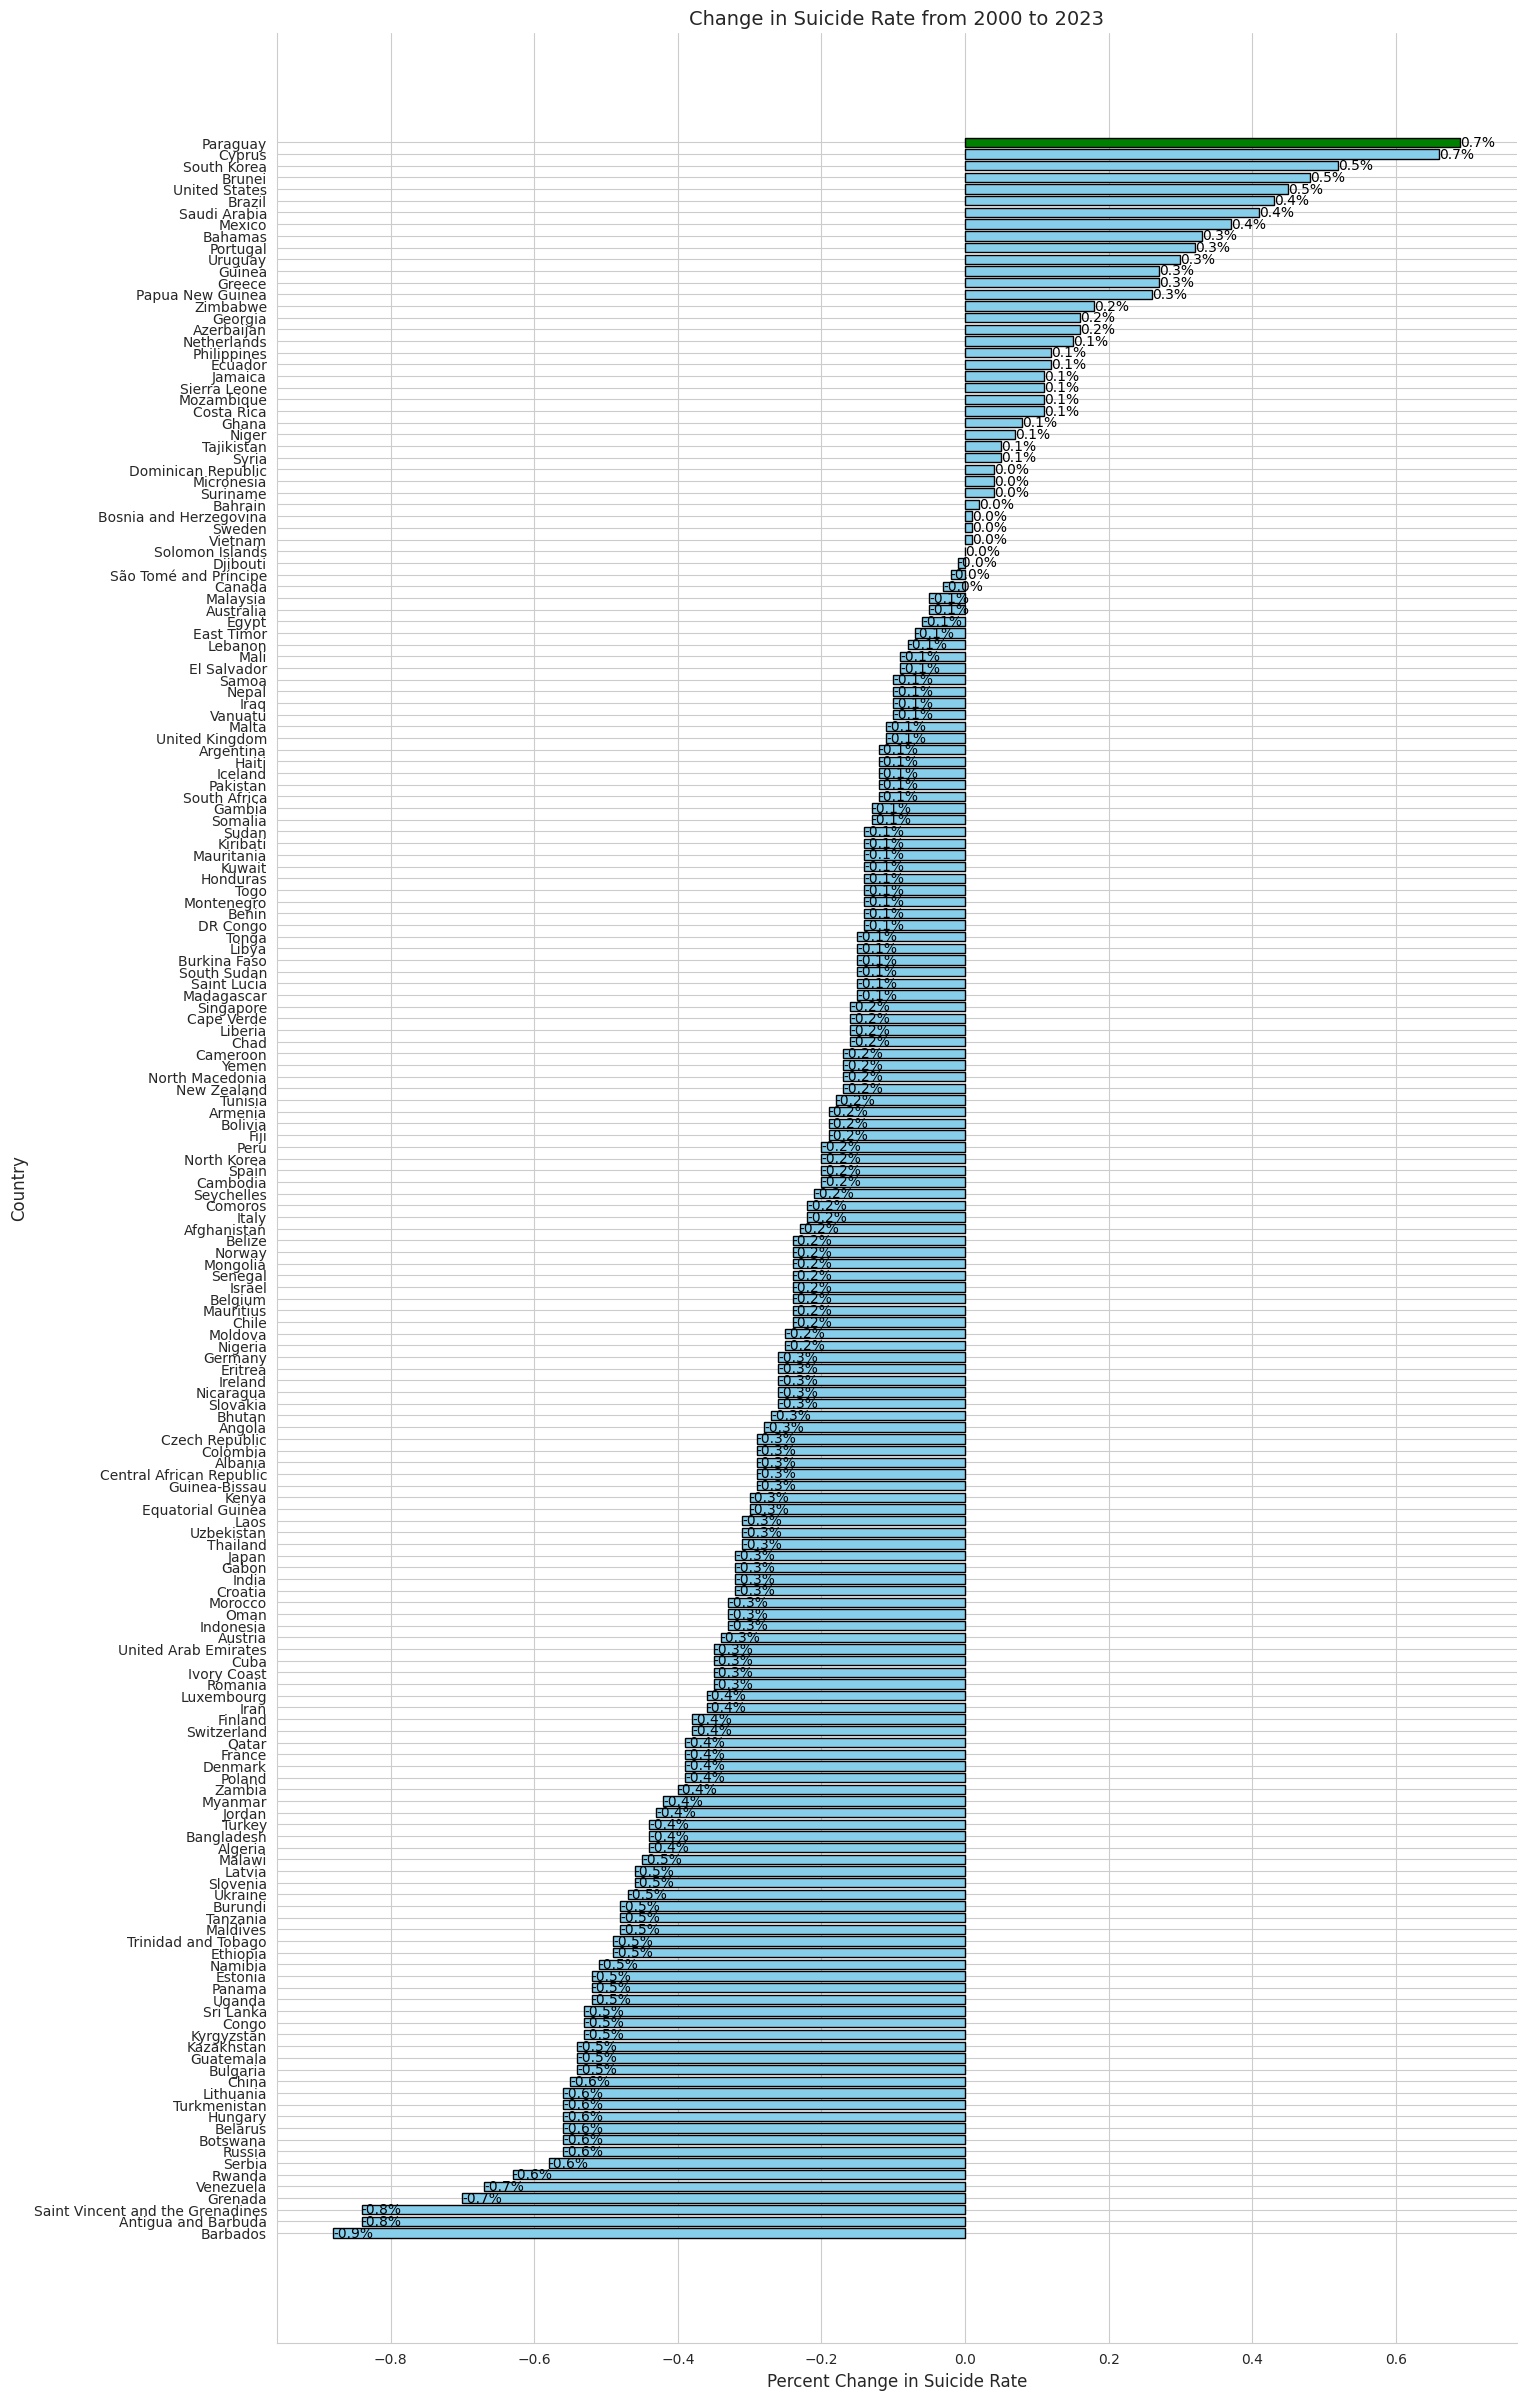

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Sort the DataFrame by Change_percent in descending order to get the best performers on top
df_sorted = data.sort_values(by='Change%', ascending=False)

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(16, 30))

# Define colors for best performers and others
colors = ['skyblue' if country != df_sorted['Country'].iloc[0] else 'green' for country in df_sorted['Country']]

# Create horizontal bar plot
bars = ax.barh(df_sorted['Country'], df_sorted['Change%'], color=colors, edgecolor='black')

# Add data labels
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', 
            va='center', ha='left', fontsize=10, color='black')

# Set labels and title
ax.set_xlabel('Percent Change in Suicide Rate', fontsize=12)
ax.set_ylabel('Country', fontsize=12)
ax.set_title('Change in Suicide Rate from 2000 to 2023', fontsize=14)

# Invert y-axis to have the highest value at the top
ax.invert_yaxis()

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show plot
plt.show()



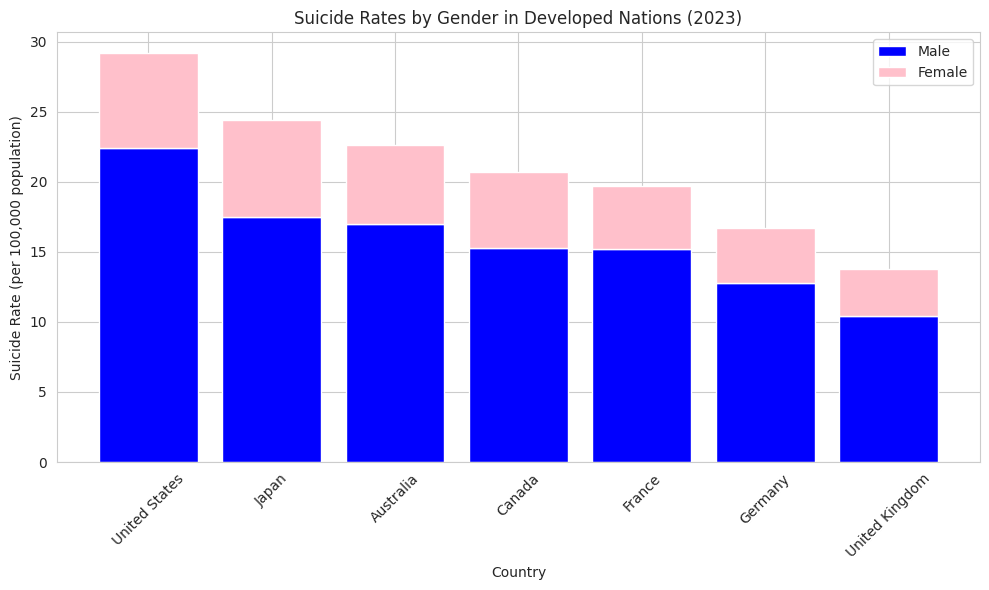

In [63]:
# List of developed nations (replace with actual list if available)
developed_nations = ["United States", "Canada", "United Kingdom", "Germany", "Japan", "France", "Australia"]

# Filter the dataset to include only developed nations
df_developed = data[data['Country'].isin(developed_nations)]

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot for male suicide rates
plt.bar(df_developed['Country'], df_developed['Male'], color='blue', label='Male')

# Bar plot for female suicide rates
plt.bar(df_developed['Country'], df_developed['Female'], color='pink', label='Female', bottom=df_developed['Male'])

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Suicide Rate (per 100,000 population)')
plt.title('Suicide Rates by Gender in Developed Nations (2023)')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

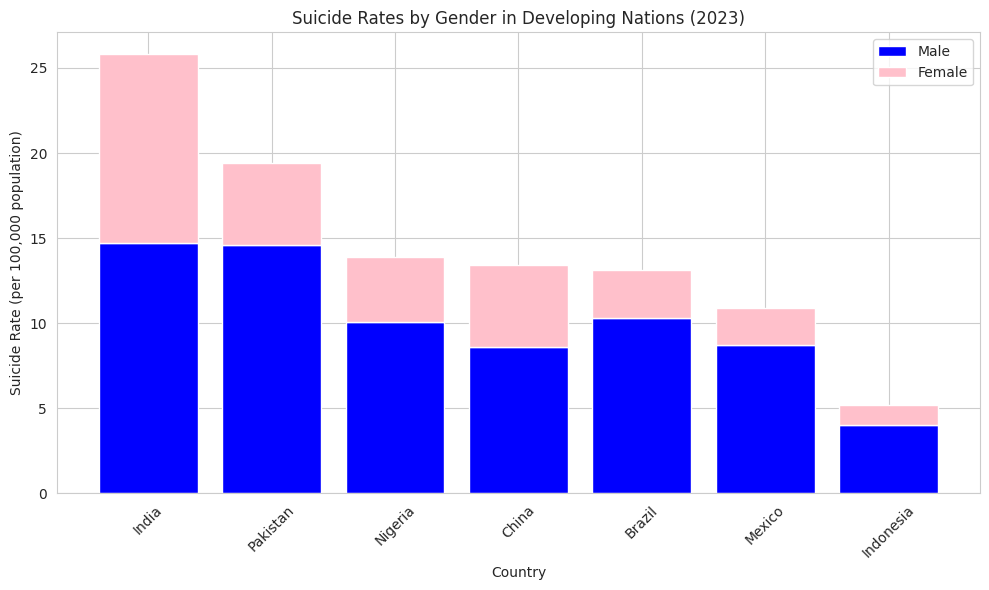

In [64]:
# List of developing nations (replace with actual list if available)
developing_nations = ["India", "Brazil", "China", "Mexico", "Indonesia", "Nigeria", "Pakistan"]

# Filter the dataset to include only developing nations
df_developing = data[data['Country'].isin(developing_nations)]

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot for male suicide rates
plt.bar(df_developing['Country'], df_developing['Male'], color='blue', label='Male')

# Bar plot for female suicide rates
plt.bar(df_developing['Country'], df_developing['Female'], color='pink', label='Female', bottom=df_developing['Male'])

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Suicide Rate (per 100,000 population)')
plt.title('Suicide Rates by Gender in Developing Nations (2023)')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

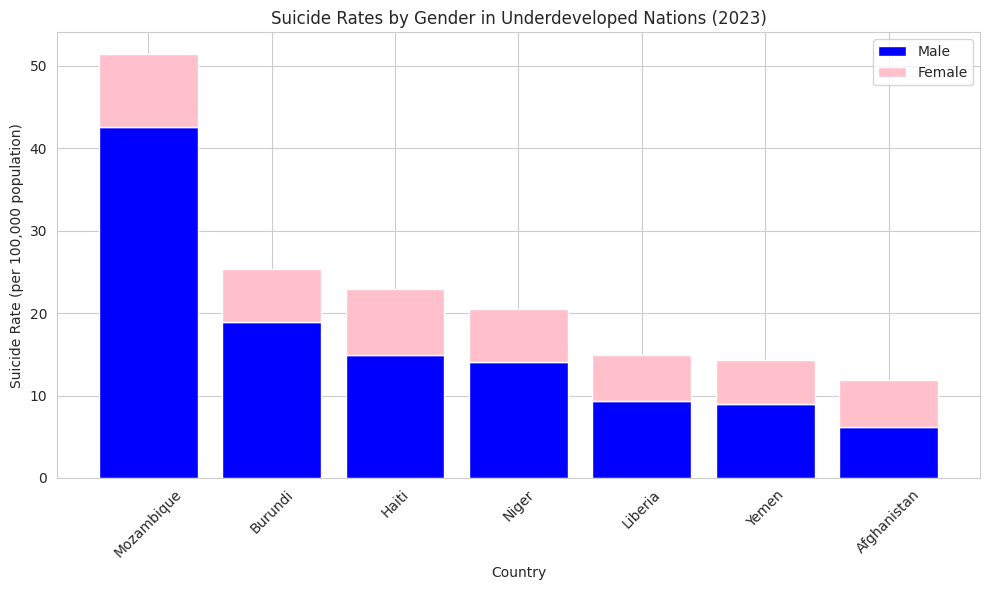

In [65]:
# List of underdeveloped nations (replace with actual list if available)
underdeveloped_nations = ["Afghanistan", "Haiti", "Yemen", "Mozambique", "Niger", "Burundi", "Liberia"]

# Filter the dataset to include only underdeveloped nations
df_underdeveloped = data[data['Country'].isin(underdeveloped_nations)]

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot for male suicide rates
plt.bar(df_underdeveloped['Country'], df_underdeveloped['Male'], color='blue', label='Male')

# Bar plot for female suicide rates
plt.bar(df_underdeveloped['Country'], df_underdeveloped['Female'], color='pink', label='Female', bottom=df_underdeveloped['Male'])

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Suicide Rate (per 100,000 population)')
plt.title('Suicide Rates by Gender in Underdeveloped Nations (2023)')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

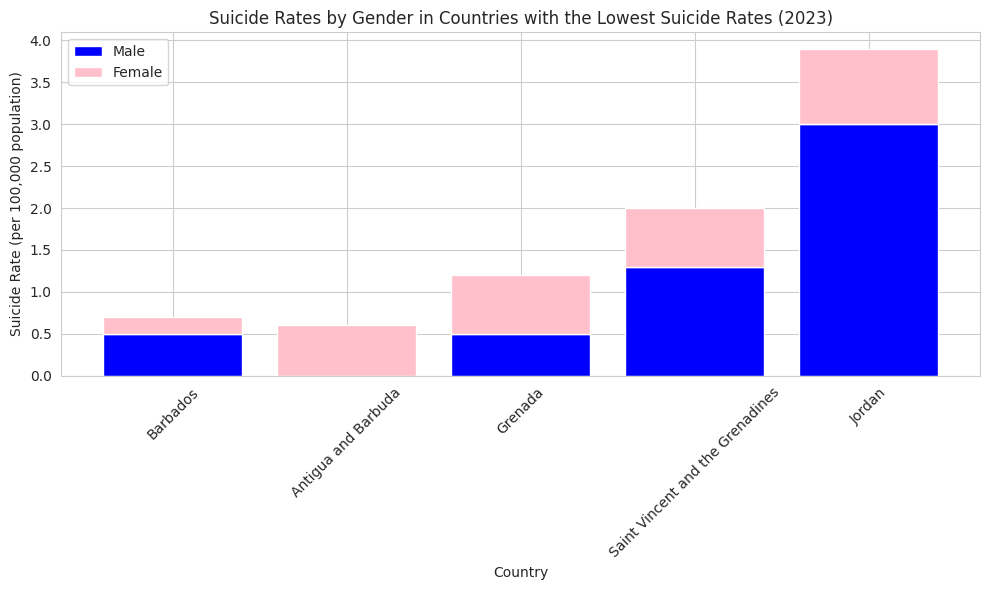

In [66]:
# Sort the DataFrame by suicide rate in ascending order to get the lowest rates on top
df_sorted = data.sort_values(by='All', ascending=True)

# Get the top 5 countries with the lowest suicide rates
lowest_countries = df_sorted.head(5)

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot for male suicide rates
plt.bar(lowest_countries['Country'], lowest_countries['Male'], color='blue', label='Male')

# Bar plot for female suicide rates
plt.bar(lowest_countries['Country'], lowest_countries['Female'], color='pink', label='Female', bottom=lowest_countries['Male'])

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Suicide Rate (per 100,000 population)')
plt.title('Suicide Rates by Gender in Countries with the Lowest Suicide Rates (2023)')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [67]:
from sklearn.model_selection import train_test_split

In [70]:
# Select features and target variable
X = data[['Male', 'Female', 'M/F', '2000']]
y = data['All']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [75]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [76]:
from sklearn.metrics import mean_squared_error
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.9789717772342136


In [77]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.9894300264466475


In [78]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9578421299347057
